In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging

import pyabc
from pyabc import Distribution, RV, ABCSMC
import pyabc.britney as brit

pyabc.settings.set_figure_params('pyabc')  # for beautified plots

# for debugging
df_logger = logging.getLogger('Distance')
df_logger.setLevel(logging.DEBUG)

## Model 1 (Normal distribution)

In [2]:
def model(p):
    """One informative, one uninformative statistic"""
    return {
        's1': p['theta'] + 0.1 * np.random.normal(),
        's2': 1 * np.random.normal(),
    }

obs = {'s1': 0, 's2': 0}

#prior = Distribution(theta=RV('uniform', -5, 10))
prior = Distribution(theta=RV('norm', loc=0, scale=100))

distances = [
    brit.Euclidean(brit.IdentityBritney()),
    brit.AdaptiveEuclidean(brit.IdentityBritney(), scale_function=brit.scale.median_absolute_deviation),
    brit.AdaptiveEuclidean(brit.IdentityBritney(), adaptive=True, scale_function=brit.scale.median_absolute_deviation),
    brit.Euclidean(brit.LearnedLinearBritney()),
    brit.Euclidean(brit.GPBritney()),
]

labels = [
    'Euclidean',
    'Calibrated Euclidean',
    'Adaptive Euclidean',
    'Learned linear',
    'GP',
]

def plot_history(history: pyabc.History, label: str):
    fig, ax = plt.subplots(1,1)
    ax = [ax]
    for t in range(history.max_t + 1):
        df, w = history.get_distribution(m=0, t=t)
        pyabc.visualization.plot_kde_1d(df, w, xmin=-20, xmax=20, numx=300,
                                        x='theta', xname="$\theta$", ax=ax[0],
                                        label="PDF t={}".format(t))
    ax[0].axvline(0, color='k', linestyle='dashed', label="True value")
    ax[0].legend()
    ax[0].set_title(label)

In [6]:
hs = []

for distance, label in zip(distances, labels):
    print(label)
    abc = ABCSMC(model, prior, distance, population_size=100)
    abc.new(pyabc.create_sqlite_db_id(), obs)
    h = abc.run(max_total_nr_simulations=1e5)
    hs.append(h)

INFO:Sampler:Parallelizing the sampling on 4 cores.


Euclidean


INFO:History:Start <ABCSMC id=13, start_time=2021-02-27 22:49:32.982055>
INFO:ABC:Calibration sample t=-1.
INFO:Epsilon:initial epsilon is 6060.067704688526
INFO:ABC:t: 0, eps: 6060.067704688526.
INFO:ABC:Acceptance rate: 100 / 165 = 6.0606e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 1302.2849876127927.
INFO:ABC:Acceptance rate: 100 / 215 = 4.6512e-01, ESS=9.9569e+01.
INFO:ABC:t: 2, eps: 311.5586265000841.
INFO:ABC:Acceptance rate: 100 / 217 = 4.6083e-01, ESS=9.7233e+01.
INFO:ABC:t: 3, eps: 92.85718084144014.
INFO:ABC:Acceptance rate: 100 / 199 = 5.0251e-01, ESS=9.9930e+01.
INFO:ABC:t: 4, eps: 30.715929757283885.
INFO:ABC:Acceptance rate: 100 / 197 = 5.0761e-01, ESS=9.9169e+01.
INFO:ABC:t: 5, eps: 8.782605865001344.
INFO:ABC:Acceptance rate: 100 / 227 = 4.4053e-01, ESS=9.8682e+01.
INFO:ABC:t: 6, eps: 3.362745126812998.
INFO:ABC:Acceptance rate: 100 / 177 = 5.6497e-01, ESS=9.9736e+01.
INFO:ABC:t: 7, eps: 1.4370262989547273.
INFO:ABC:Acceptance rate: 100 / 212 = 4.7170e-01, ESS=9.9467e+01.


Calibrated Euclidean


INFO:Epsilon:initial epsilon is 2.773365444068263
INFO:ABC:t: 0, eps: 2.773365444068263.
INFO:ABC:Acceptance rate: 100 / 270 = 3.7037e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 1.1943197389675344.
INFO:ABC:Acceptance rate: 100 / 328 = 3.0488e-01, ESS=9.9513e+01.
INFO:ABC:t: 2, eps: 0.45956888321853806.
INFO:ABC:Acceptance rate: 100 / 485 = 2.0619e-01, ESS=9.8339e+01.
INFO:ABC:t: 3, eps: 0.22389241285847314.
INFO:ABC:Acceptance rate: 100 / 775 = 1.2903e-01, ESS=9.9698e+01.
INFO:ABC:t: 4, eps: 0.0896573461218066.
INFO:ABC:Acceptance rate: 100 / 1152 = 8.6806e-02, ESS=9.6988e+01.
INFO:ABC:t: 5, eps: 0.04492892373618107.
INFO:ABC:Acceptance rate: 100 / 1732 = 5.7737e-02, ESS=9.7772e+01.
INFO:ABC:t: 6, eps: 0.021182057970921077.
INFO:ABC:Acceptance rate: 100 / 2182 = 4.5830e-02, ESS=9.9092e+01.
INFO:ABC:t: 7, eps: 0.010209091727872207.
INFO:ABC:Acceptance rate: 100 / 3362 = 2.9744e-02, ESS=9.7402e+01.
INFO:ABC:t: 8, eps: 0.005412557432793726.
INFO:ABC:Acceptance rate: 100 / 4569 = 2.1887e-02,

Adaptive Euclidean


INFO:Epsilon:initial epsilon is 2.689915013005497
INFO:ABC:t: 0, eps: 2.689915013005497.
INFO:ABC:Acceptance rate: 100 / 171 = 5.8480e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 3.2009963950447613.
INFO:ABC:Acceptance rate: 100 / 308 = 3.2468e-01, ESS=9.9495e+01.
INFO:ABC:t: 2, eps: 3.2426144966103823.
INFO:ABC:Acceptance rate: 100 / 498 = 2.0080e-01, ESS=9.7047e+01.
INFO:ABC:t: 3, eps: 3.0534719568067867.
INFO:ABC:Acceptance rate: 100 / 628 = 1.5924e-01, ESS=9.9273e+01.
INFO:ABC:t: 4, eps: 2.6501145739600194.
INFO:ABC:Acceptance rate: 100 / 969 = 1.0320e-01, ESS=9.9629e+01.
INFO:ABC:t: 5, eps: 3.19220868740985.
INFO:ABC:Acceptance rate: 100 / 1039 = 9.6246e-02, ESS=9.6643e+01.
INFO:ABC:t: 6, eps: 3.3755477774253047.
INFO:ABC:Acceptance rate: 100 / 1834 = 5.4526e-02, ESS=9.8752e+01.
INFO:ABC:t: 7, eps: 3.3548366147384856.
INFO:ABC:Acceptance rate: 100 / 2055 = 4.8662e-02, ESS=9.7961e+01.
INFO:ABC:t: 8, eps: 3.5949366221661.
INFO:ABC:Acceptance rate: 100 / 3251 = 3.0760e-02, ESS=9.6928e+01

Learned linear


INFO:Epsilon:initial epsilon is 4427.774175576301
INFO:ABC:t: 0, eps: 4427.774175576301.
INFO:ABC:Acceptance rate: 100 / 237 = 4.2194e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 966.5221234583427.
INFO:ABC:Acceptance rate: 100 / 195 = 5.1282e-01, ESS=9.8367e+01.
INFO:ABC:t: 2, eps: 239.67761673408023.
INFO:ABC:Acceptance rate: 100 / 202 = 4.9505e-01, ESS=9.9478e+01.
INFO:ABC:t: 3, eps: 58.88561177634985.
INFO:ABC:Acceptance rate: 100 / 216 = 4.6296e-01, ESS=9.9037e+01.
INFO:ABC:t: 4, eps: 18.11198960332314.
INFO:ABC:Acceptance rate: 100 / 189 = 5.2910e-01, ESS=9.9887e+01.
INFO:ABC:t: 5, eps: 3.5344315243724806.
INFO:ABC:Acceptance rate: 100 / 185 = 5.4054e-01, ESS=9.9711e+01.
INFO:ABC:t: 6, eps: 0.8009158984648725.
INFO:ABC:Acceptance rate: 100 / 211 = 4.7393e-01, ESS=9.9599e+01.
INFO:ABC:t: 7, eps: 0.2159509335190752.
INFO:ABC:Acceptance rate: 100 / 168 = 5.9524e-01, ESS=9.9330e+01.
INFO:ABC:t: 8, eps: 0.04991360967550496.
INFO:ABC:Acceptance rate: 100 / 232 = 4.3103e-01, ESS=9.8154e+01.

GP


INFO:Epsilon:initial epsilon is 5512.252370853146
INFO:ABC:t: 0, eps: 5512.252370853146.
INFO:ABC:Acceptance rate: 100 / 201 = 4.9751e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 1087.8784843743783.
INFO:ABC:Acceptance rate: 100 / 190 = 5.2632e-01, ESS=9.9768e+01.
INFO:ABC:t: 2, eps: 231.83878351509102.
INFO:ABC:Acceptance rate: 100 / 194 = 5.1546e-01, ESS=9.7639e+01.
INFO:ABC:t: 3, eps: 72.73790986686375.
INFO:ABC:Acceptance rate: 100 / 191 = 5.2356e-01, ESS=9.9829e+01.
INFO:ABC:t: 4, eps: 15.705292501729653.
INFO:ABC:Acceptance rate: 100 / 193 = 5.1813e-01, ESS=9.9161e+01.
INFO:ABC:t: 5, eps: 4.364246432648837.
INFO:ABC:Acceptance rate: 100 / 190 = 5.2632e-01, ESS=9.7748e+01.
INFO:ABC:t: 6, eps: 1.0016786245202867.
INFO:ABC:Acceptance rate: 100 / 228 = 4.3860e-01, ESS=9.9433e+01.
INFO:ABC:t: 7, eps: 0.24961670589117094.
INFO:ABC:Acceptance rate: 100 / 202 = 4.9505e-01, ESS=9.9836e+01.
INFO:ABC:t: 8, eps: 0.07356544876938897.
INFO:ABC:Acceptance rate: 100 / 213 = 4.6948e-01, ESS=9.5619e+0

<AxesSubplot:title={'center':'Required samples'}, xlabel='Run', ylabel='Samples'>

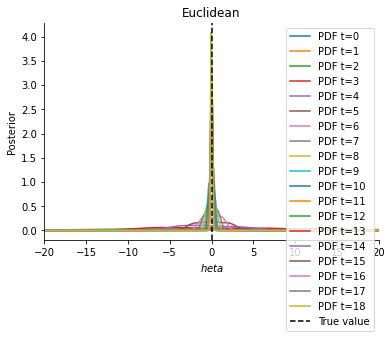

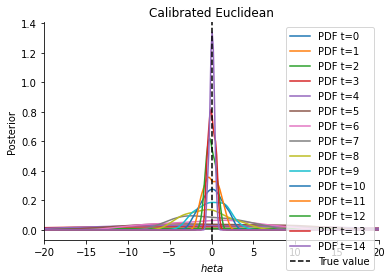

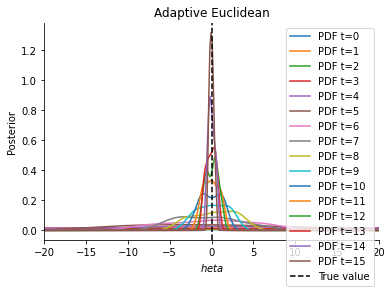

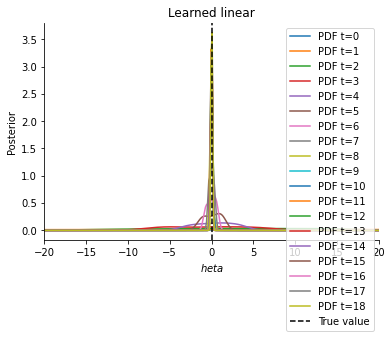

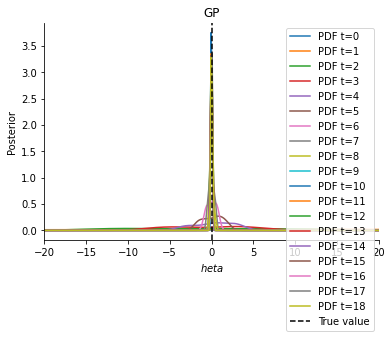

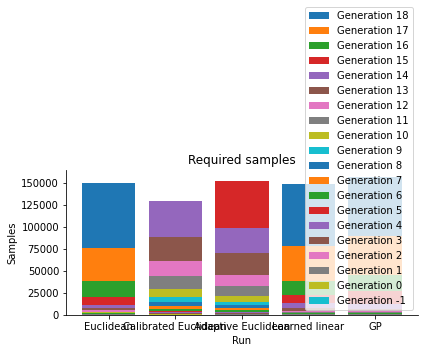

In [7]:
for h, label in zip(hs, labels):
    plot_history(h, label)
pyabc.visualization.plot_sample_numbers(hs, labels)

## Model 2 (GK)

In [8]:
def gk(A, B, c, g, k, n: int = 1):
    """One informative, one uninformative statistic"""
    z = np.random.normal(size=n)
    e = np.exp(- g * z)
    return A + B * (1 + c * (1 - e) / (1 + e)) * (1 + z**2)**k * z

def model(p):
    A, B, g, k = [p[key] for key in ['A', 'B', 'g', 'k']]
    c = 0.8
    vals = gk(A=A, B=B, c=c, g=g, k=k, n=10000)
    ordered = np.sort(vals)
    subset = ordered[1250:8751:1250]
    return {'y': subset}

p_true = {'A': 3, 'B': 1, 'g': 1.5, 'k': 0.5}

obs = model(p_true)

#prior = Distribution(theta=RV('uniform', -5, 10))
prior = Distribution(A=RV('uniform', 0, 10),
                     B=RV('uniform', 0, 10),
                     g=RV('uniform', 0, 10),
                     k=RV('uniform', 0, 10))

distances = [
    brit.Euclidean(brit.IdentityBritney()),
    brit.AdaptiveEuclidean(brit.IdentityBritney(), scale_function=brit.scale.median_absolute_deviation),
    brit.AdaptiveEuclidean(brit.IdentityBritney(), adaptive=True, scale_function=brit.scale.median_absolute_deviation),
    brit.Euclidean(brit.LearnedLinearBritney()),
    brit.Euclidean(brit.GPBritney()),
]

labels = [
    'Euclidean',
    'Calibrated Euclidean',
    'Adaptive Euclidean',
    'Learned linear',
    'GP',
]

bounds = {key: (0, 10) for key in ['A', 'B', 'g', 'k']}

def plot_history(history: pyabc.History, label: str):
    fig, ax = plt.subplots(1, 1)
    for t in range(history.max_t + 1):
        df, w = history.get_distribution(m=0, t=t)
        pyabc.visualization.plot_kde_matrix(
            df, w, limits=limits, label="PDF t={}".format(t), ax=ax)

In [18]:
hs = []

for distance, label in zip(distances, labels):
    print(label)
    abc = ABCSMC(model, prior, distance, population_size=1000)
    abc.new(pyabc.create_sqlite_db_id(), obs)
    h = abc.run(max_total_nr_simulations=5e4)
    hs.append(h)

INFO:Sampler:Parallelizing the sampling on 4 cores.
INFO:History:Start <ABCSMC id=26, start_time=2021-02-28 00:41:06.124131>
INFO:ABC:Calibration sample t=-1.


Euclidean


INFO:Epsilon:initial epsilon is 256437.81167215214
INFO:ABC:t: 0, eps: 256437.81167215214.
INFO:ABC:Acceptance rate: 1000 / 2032 = 4.9213e-01, ESS=1.0000e+03.
INFO:ABC:t: 1, eps: 3558.891934712125.
INFO:ABC:Acceptance rate: 1000 / 2115 = 4.7281e-01, ESS=8.2055e+02.
INFO:ABC:t: 2, eps: 569.3554204701604.
INFO:ABC:Acceptance rate: 1000 / 2260 = 4.4248e-01, ESS=7.8683e+02.
INFO:ABC:t: 3, eps: 186.89563198546887.
INFO:ABC:Acceptance rate: 1000 / 2260 = 4.4248e-01, ESS=7.6318e+02.
INFO:ABC:t: 4, eps: 60.262340855984746.
INFO:ABC:Acceptance rate: 1000 / 2267 = 4.4111e-01, ESS=5.6261e+02.
INFO:ABC:t: 5, eps: 28.385510284070435.
INFO:ABC:Acceptance rate: 1000 / 1940 = 5.1546e-01, ESS=8.5507e+02.
INFO:ABC:t: 6, eps: 12.614861957724479.
INFO:ABC:Acceptance rate: 1000 / 2100 = 4.7619e-01, ESS=5.5023e+02.
INFO:ABC:t: 7, eps: 5.992666325669382.
INFO:ABC:Acceptance rate: 1000 / 2317 = 4.3159e-01, ESS=3.9742e+02.
INFO:ABC:t: 8, eps: 3.4809523077041717.
INFO:ABC:Acceptance rate: 1000 / 2381 = 4.1999e-

Calibrated Euclidean


INFO:Epsilon:initial epsilon is 20.67225698230968
INFO:ABC:t: 0, eps: 20.67225698230968.
INFO:ABC:Acceptance rate: 1000 / 1906 = 5.2466e-01, ESS=1.0000e+03.
INFO:ABC:t: 1, eps: 5.734116010285347.
INFO:ABC:Acceptance rate: 1000 / 2052 = 4.8733e-01, ESS=8.4555e+02.
INFO:ABC:t: 2, eps: 2.4343293222580398.
INFO:ABC:Acceptance rate: 1000 / 2024 = 4.9407e-01, ESS=7.5640e+02.
INFO:ABC:t: 3, eps: 1.1387989388375102.
INFO:ABC:Acceptance rate: 1000 / 2187 = 4.5725e-01, ESS=7.1723e+02.
INFO:ABC:t: 4, eps: 0.5435290185962596.
INFO:ABC:Acceptance rate: 1000 / 2146 = 4.6598e-01, ESS=8.5921e+02.
INFO:ABC:t: 5, eps: 0.23873000095907854.
INFO:ABC:Acceptance rate: 1000 / 2188 = 4.5704e-01, ESS=8.5081e+02.
INFO:ABC:t: 6, eps: 0.10068794743556714.
INFO:ABC:Acceptance rate: 1000 / 2283 = 4.3802e-01, ESS=8.1774e+02.
INFO:ABC:t: 7, eps: 0.04684931779609823.
INFO:ABC:Acceptance rate: 1000 / 2070 = 4.8309e-01, ESS=8.4651e+02.
INFO:ABC:t: 8, eps: 0.02804556719870183.
INFO:ABC:Acceptance rate: 1000 / 2037 = 4.90

Adaptive Euclidean


INFO:Epsilon:initial epsilon is 19.848086116471208
INFO:ABC:t: 0, eps: 19.848086116471208.
INFO:ABC:Acceptance rate: 1000 / 2008 = 4.9801e-01, ESS=1.0000e+03.
INFO:ABC:t: 1, eps: 22.127140399528056.
INFO:ABC:Acceptance rate: 1000 / 2128 = 4.6992e-01, ESS=8.7081e+02.
INFO:ABC:t: 2, eps: 20.41624790586943.
INFO:ABC:Acceptance rate: 1000 / 2176 = 4.5956e-01, ESS=6.8854e+02.
INFO:ABC:t: 3, eps: 19.28020563523429.
INFO:ABC:Acceptance rate: 1000 / 2133 = 4.6882e-01, ESS=7.1713e+02.
INFO:ABC:t: 4, eps: 16.36318020141518.
INFO:ABC:Acceptance rate: 1000 / 2156 = 4.6382e-01, ESS=1.2723e+02.
INFO:ABC:t: 5, eps: 13.639794516968358.
INFO:ABC:Acceptance rate: 1000 / 2695 = 3.7106e-01, ESS=8.3244e+02.
INFO:ABC:t: 6, eps: 14.254699257009005.
INFO:ABC:Acceptance rate: 1000 / 2193 = 4.5600e-01, ESS=7.7344e+02.
INFO:ABC:t: 7, eps: 12.182581533670408.
INFO:ABC:Acceptance rate: 1000 / 2112 = 4.7348e-01, ESS=7.9900e+02.
INFO:ABC:t: 8, eps: 12.75628593058575.
INFO:ABC:Acceptance rate: 1000 / 2157 = 4.6361e-0

Learned linear


INFO:Epsilon:initial epsilon is 40.85183996674579
INFO:ABC:t: 0, eps: 40.85183996674579.
INFO:ABC:Acceptance rate: 1000 / 1931 = 5.1787e-01, ESS=1.0000e+03.
INFO:ABC:t: 1, eps: 16.494562927655064.
INFO:ABC:Acceptance rate: 1000 / 2042 = 4.8972e-01, ESS=8.5382e+02.
INFO:ABC:t: 2, eps: 6.832984643484062.
INFO:ABC:Acceptance rate: 1000 / 2077 = 4.8146e-01, ESS=8.0755e+02.
INFO:ABC:t: 3, eps: 3.2019443167015824.
INFO:ABC:Acceptance rate: 1000 / 2060 = 4.8544e-01, ESS=8.5929e+02.
INFO:ABC:t: 4, eps: 1.6518860705166536.
INFO:ABC:Acceptance rate: 1000 / 2006 = 4.9850e-01, ESS=8.5655e+02.
INFO:ABC:t: 5, eps: 1.0323360887255946.
INFO:ABC:Acceptance rate: 1000 / 1942 = 5.1493e-01, ESS=8.4804e+02.
INFO:ABC:t: 6, eps: 0.7197068188990798.
INFO:ABC:Acceptance rate: 1000 / 2109 = 4.7416e-01, ESS=8.8861e+02.
INFO:ABC:t: 7, eps: 0.501030954162033.
INFO:ABC:Acceptance rate: 1000 / 2226 = 4.4924e-01, ESS=8.2837e+02.
INFO:ABC:t: 8, eps: 0.34295271957411133.
INFO:ABC:Acceptance rate: 1000 / 2257 = 4.4307e-

GP


INFO:Epsilon:initial epsilon is 38.470492321143695
INFO:ABC:t: 0, eps: 38.470492321143695.
INFO:ABC:Acceptance rate: 1000 / 1966 = 5.0865e-01, ESS=1.0000e+03.
INFO:ABC:t: 1, eps: 15.532843565802185.
INFO:ABC:Acceptance rate: 1000 / 2060 = 4.8544e-01, ESS=8.4415e+02.
INFO:ABC:t: 2, eps: 6.331135552939261.
INFO:ABC:Acceptance rate: 1000 / 2039 = 4.9044e-01, ESS=8.2607e+02.
INFO:ABC:t: 3, eps: 3.0751077976303556.
INFO:ABC:Acceptance rate: 1000 / 2065 = 4.8426e-01, ESS=8.9008e+02.
INFO:ABC:t: 4, eps: 1.589878305127867.
INFO:ABC:Acceptance rate: 1000 / 2108 = 4.7438e-01, ESS=8.8564e+02.
INFO:ABC:t: 5, eps: 0.9707649642267779.
INFO:ABC:Acceptance rate: 1000 / 2032 = 4.9213e-01, ESS=8.5998e+02.
INFO:ABC:t: 6, eps: 0.6705705398214641.
INFO:ABC:Acceptance rate: 1000 / 2147 = 4.6577e-01, ESS=9.0282e+02.
INFO:ABC:t: 7, eps: 0.4386792809034456.
INFO:ABC:Acceptance rate: 1000 / 2143 = 4.6664e-01, ESS=8.9629e+02.
INFO:ABC:t: 8, eps: 0.28623813552819816.
INFO:ABC:Acceptance rate: 1000 / 2035 = 4.9140

<AxesSubplot:title={'center':'Required samples'}, xlabel='Run', ylabel='Samples'>

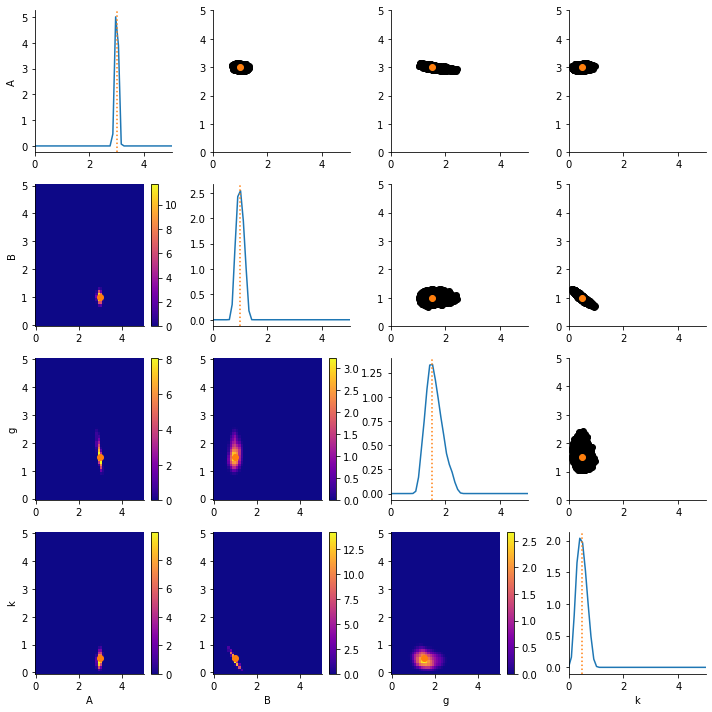

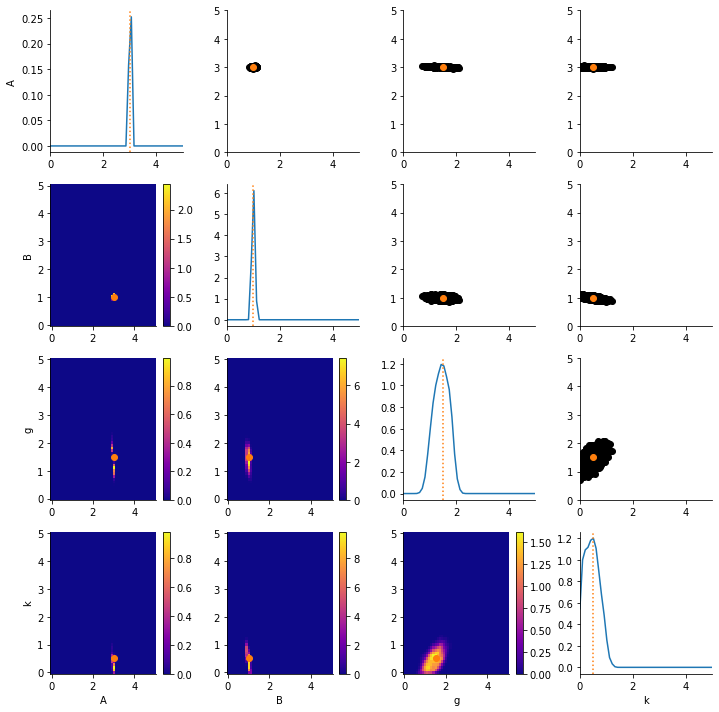

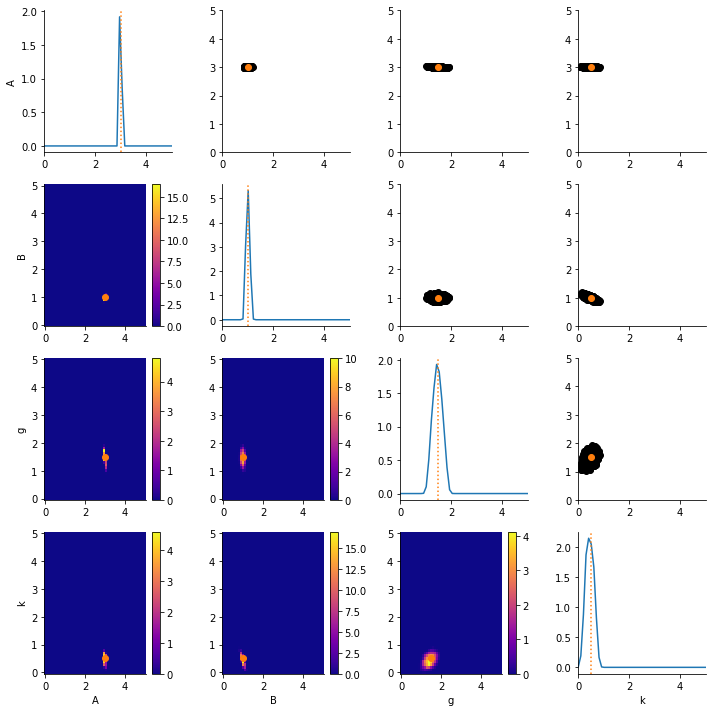

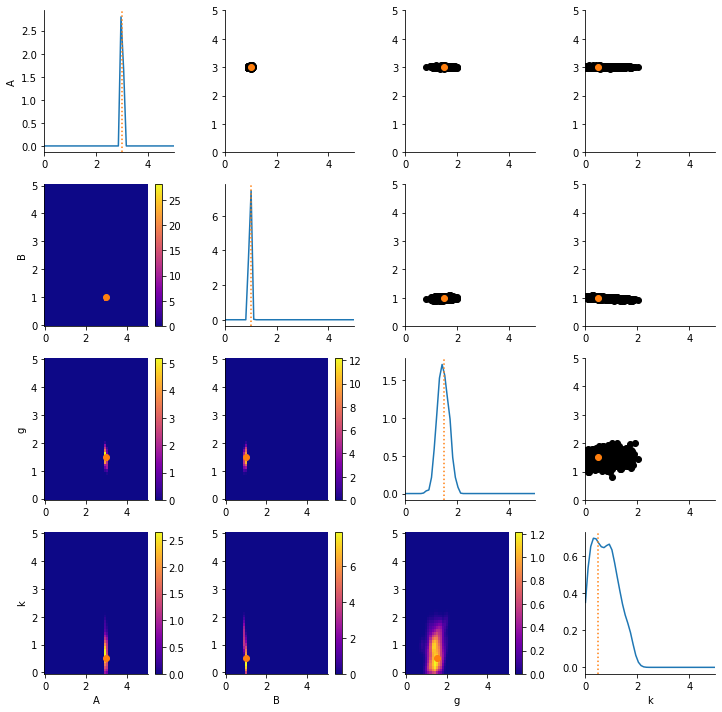

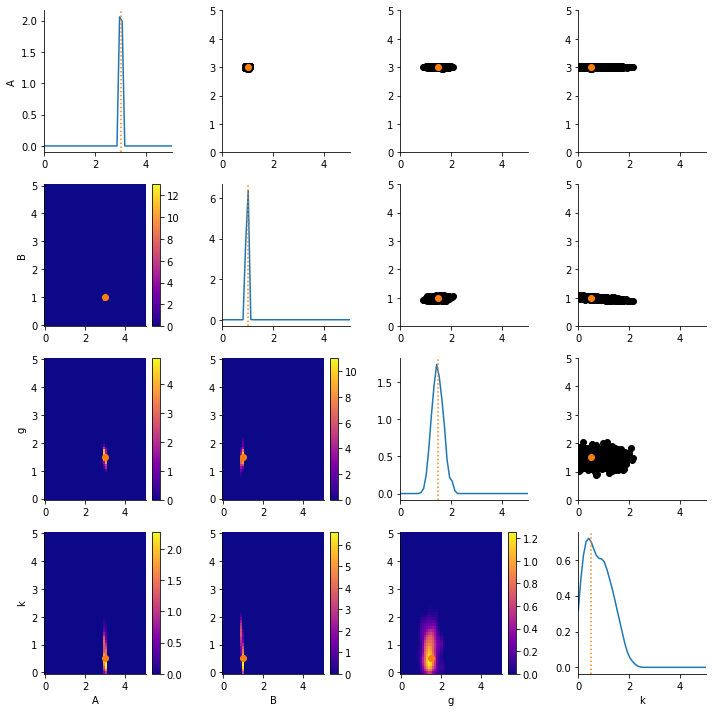

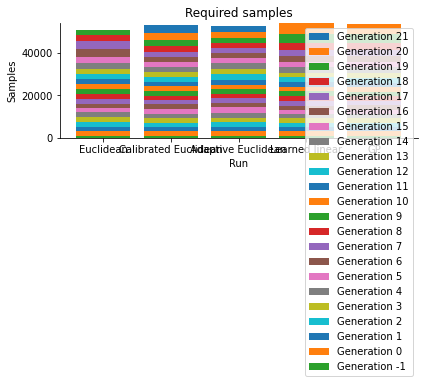

In [19]:
limits = {key: (0, 5) for key in ['A', 'B', 'g', 'k']}

def plot_history(history: pyabc.History, label: str):
    #fig, ax = plt.subplots(1, 1)
    df, w = history.get_distribution(m=0)
    pyabc.visualization.plot_kde_matrix(
        df, w, limits=limits, refval=p_true)

for h, label in zip(hs, labels):
    plot_history(h, label)
pyabc.visualization.plot_sample_numbers(hs, labels)

## Model 3 (Lotka-Volterra)

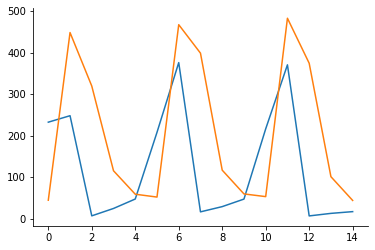

In [8]:
import ssa

reactants = np.array([[1, 0],
                      [1, 1],
                      [0, 1]])
products = np.array([[2, 0],
                     [0, 2],
                     [0, 0]])

x0 = np.array([50, 100])
p_true = {'p1': np.log(1), 'p2': np.log(0.005), 'p3': np.log(0.6)}
t_max = 32
output = ssa.output.FullOutput()
output = ssa.output.ArrayOutput(ts=np.arange(2, 32, 2))

sigma = np.exp(2.3)

def model(p):
    k = np.array([p['p1'], p['p2'], p['p3']])
    # log parameters
    k = np.exp(k)
    ssa_model = ssa.Model(reactants, products, x0=x0, k=k, t_max=t_max, max_reactions=1e5, output=output)
    try:
        ret = ssa_model.simulate()
        # shape: (t, 2)
        sims = ret.list_xs[0]
    except ValueError:
        sims = np.empty_like(obs['y'])
        sims[:] = np.nan

    return {
        'y': sims + sigma * np.random.normal(size=sims.shape),
    }

np.random.seed(0)
obs = model(p_true)

plt.plot(obs['y'][:,0])
plt.plot(obs['y'][:,1])

prior = Distribution(p1=RV('uniform', -6, 8),
                     p2=RV('uniform', -6, 8),
                     p3=RV('uniform', -6, 8))

distances = [
    brit.Euclidean(brit.IdentityBritney()),
    brit.AdaptiveEuclidean(brit.IdentityBritney(), scale_function=brit.scale.median_absolute_deviation),
    brit.AdaptiveEuclidean(brit.IdentityBritney(), adaptive=True, scale_function=brit.scale.median_absolute_deviation),
    brit.Euclidean(brit.LearnedLinearBritney()),
    brit.Euclidean(brit.GPBritney()),
]

labels = [
    'Euclidean',
    'Calibrated Euclidean',
    'Adaptive Euclidean',
    'Learned linear',
    'GP',
]

limits = {key: (-6, 2) for key in ['p1', 'p2', 'p3', 'p4']}

def plot_history(history: pyabc.History, label: str):
    #fig, ax = plt.subplots(1, 1)
    df, w = history.get_distribution(m=0)
    pyabc.visualization.plot_kde_matrix(
        df, w, limits=limits, refval=p_true)

In [6]:
hs = []

for distance, label in zip(distances, labels):
    print(label)
    abc = ABCSMC(model, prior, distance, population_size=100)
    abc.new(pyabc.create_sqlite_db_id(), obs)
    h = abc.run(max_total_nr_simulations=5000)
    hs.append(h)

INFO:Sampler:Parallelizing the sampling on 4 cores.
INFO:History:Start <ABCSMC id=40, start_time=2021-02-28 13:58:00.622387>
INFO:ABC:Calibration sample t=-1.


Euclidean


INFO:Epsilon:initial epsilon is 1427318.1175864039
INFO:ABC:t: 0, eps: 1427318.1175864039.
INFO:ABC:Acceptance rate: 100 / 215 = 4.6512e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 1094147.084068821.
INFO:ABC:Acceptance rate: 100 / 186 = 5.3763e-01, ESS=6.5611e+01.
INFO:ABC:t: 2, eps: 1026761.6503618462.
INFO:ABC:Acceptance rate: 100 / 277 = 3.6101e-01, ESS=8.9542e+01.
INFO:ABC:t: 3, eps: 1001427.2038311244.
INFO:ABC:Acceptance rate: 100 / 329 = 3.0395e-01, ESS=8.2917e+01.
INFO:ABC:t: 4, eps: 981414.9764230959.
INFO:ABC:Acceptance rate: 100 / 704 = 1.4205e-01, ESS=7.9594e+01.
INFO:ABC:t: 5, eps: 963585.4572450161.
INFO:ABC:Acceptance rate: 100 / 664 = 1.5060e-01, ESS=6.9812e+01.
INFO:ABC:t: 6, eps: 944861.2314621086.
INFO:ABC:Acceptance rate: 100 / 774 = 1.2920e-01, ESS=8.4029e+01.
INFO:ABC:t: 7, eps: 928498.2727413075.
INFO:ABC:Acceptance rate: 100 / 428 = 2.3364e-01, ESS=6.7034e+01.
INFO:ABC:t: 8, eps: 912886.1040813414.
INFO:ABC:Acceptance rate: 100 / 477 = 2.0964e-01, ESS=8.3356e+01.
I

Calibrated Euclidean


INFO:Epsilon:initial epsilon is 8912.781681556544
INFO:ABC:t: 0, eps: 8912.781681556544.
INFO:ABC:Acceptance rate: 100 / 190 = 5.2632e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 8534.865443699544.
INFO:ABC:Acceptance rate: 100 / 253 = 3.9526e-01, ESS=8.7952e+01.
INFO:ABC:t: 2, eps: 8336.49387199455.
INFO:ABC:Acceptance rate: 100 / 422 = 2.3697e-01, ESS=8.1816e+01.
INFO:ABC:t: 3, eps: 8088.181001507884.
INFO:ABC:Acceptance rate: 100 / 664 = 1.5060e-01, ESS=5.3476e+01.
INFO:ABC:t: 4, eps: 7691.8025319210265.
INFO:ABC:Acceptance rate: 100 / 504 = 1.9841e-01, ESS=7.6032e+01.
INFO:ABC:t: 5, eps: 7097.26957280014.
INFO:ABC:Acceptance rate: 100 / 360 = 2.7778e-01, ESS=8.5984e+01.
INFO:ABC:t: 6, eps: 6646.87975385709.
INFO:ABC:Acceptance rate: 100 / 552 = 1.8116e-01, ESS=6.1230e+01.
INFO:ABC:t: 7, eps: 6193.536948168246.
INFO:ABC:Acceptance rate: 100 / 961 = 1.0406e-01, ESS=4.2917e+01.
INFO:ABC:t: 8, eps: 5603.320884474755.
INFO:ABC:Acceptance rate: 100 / 1024 = 9.7656e-02, ESS=8.7856e+01.
INFO:p

Adaptive Euclidean


INFO:Epsilon:initial epsilon is 9985.977919012113
INFO:ABC:t: 0, eps: 9985.977919012113.
INFO:ABC:Acceptance rate: 100 / 180 = 5.5556e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 9596.546693994966.
INFO:ABC:Acceptance rate: 100 / 337 = 2.9674e-01, ESS=7.9473e+01.
INFO:ABC:t: 2, eps: 7452.662282976227.
INFO:ABC:Acceptance rate: 100 / 520 = 1.9231e-01, ESS=6.8944e+01.
INFO:ABC:t: 3, eps: 3866.593286408591.
INFO:ABC:Acceptance rate: 100 / 265 = 3.7736e-01, ESS=5.5250e+01.
INFO:ABC:t: 4, eps: 10001.43680433902.
INFO:ABC:Acceptance rate: 100 / 275 = 3.6364e-01, ESS=6.6357e+01.
INFO:ABC:t: 5, eps: 14539.53015587215.
INFO:ABC:Acceptance rate: 100 / 628 = 1.5924e-01, ESS=7.6723e+01.
INFO:ABC:t: 6, eps: 8765.084393561165.
INFO:ABC:Acceptance rate: 100 / 492 = 2.0325e-01, ESS=2.4349e+01.
INFO:ABC:t: 7, eps: 7219.387269487505.
INFO:ABC:Acceptance rate: 100 / 1298 = 7.7042e-02, ESS=4.9820e+01.
INFO:ABC:t: 8, eps: 1676.7830924811872.
INFO:ABC:Acceptance rate: 100 / 1116 = 8.9606e-02, ESS=2.2024e+01.
IN

Learned linear


INFO:History:Done <ABCSMC id=43, duration=0:00:06.683157, end_time=2021-02-28 14:18:41.374071>


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

<AxesSubplot:title={'center':'Required samples'}, xlabel='Run', ylabel='Samples'>

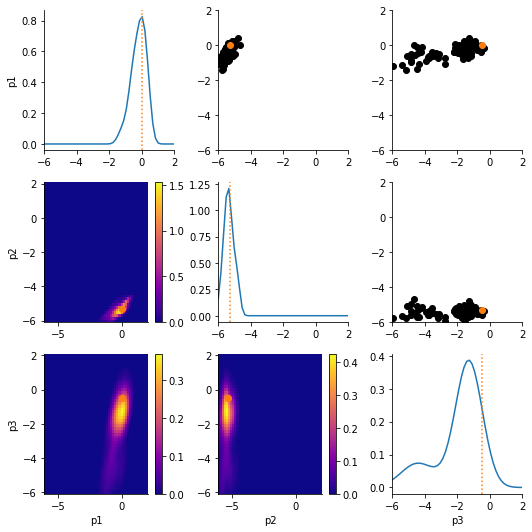

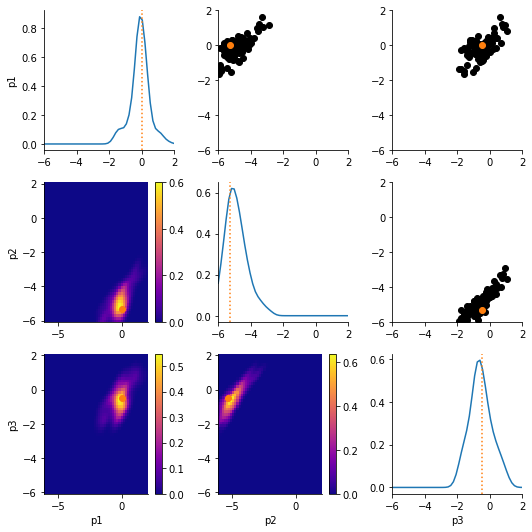

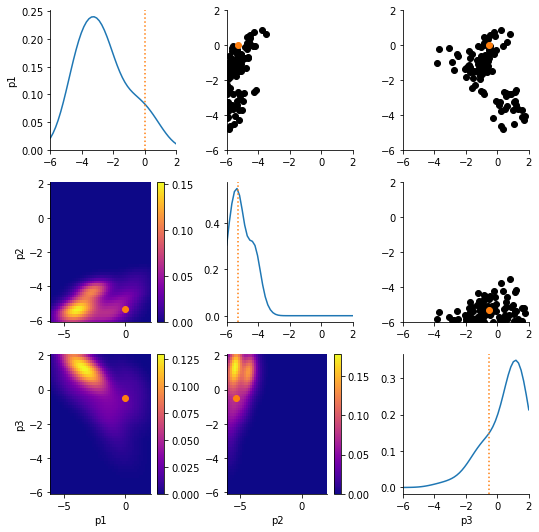

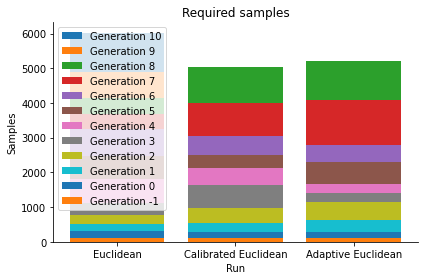

In [10]:
for h, label in zip(hs[:3], labels[:3]):
    plot_history(h, label)
pyabc.visualization.plot_sample_numbers(hs, labels[:3])